<a href="https://colab.research.google.com/github/gilcu2/mlpython/blob/master/dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [24]:
!ls '/content/gdrive/My Drive/data'/dogs-vs-cats

sampleSubmission.csv  test1.zip  train.zip


In [0]:
!mkdir data

In [0]:
!mkdir data/dogs-vs-cats
!mkdir data/dogs-vs-cats-small

In [0]:
!cp  '/content/gdrive/My Drive/data/dogs-vs-cats'/*.zip data/dogs-vs-cats

In [0]:
!unzip -q data/dogs-vs-cats/train.zip -d data/dogs-vs-cats

In [7]:
!ls data/dogs-vs-cats

test1.zip  train  train.zip


In [0]:
import os, shutil
original_dataset_dir = 'data/dogs-vs-cats/train'
base_dir = 'data/dogs-vs-cats-small'

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
!ls data/dogs-vs-cats-small/train/cats

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)  

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [18]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)




Epoch 1/30





100/100 [==============================] - 108s 1s/step - loss: 0.6902 - acc: 0.5335 - val_loss: 0.6864 - val_acc: 0.5210
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6657 - acc: 0.5880 - val_loss: 0.6534 - val_acc: 0.6070
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6254 - acc: 0.6635 - val_loss: 0.6728 - val_acc: 0.5790
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5799 - acc: 0.7040 - val_loss: 0.6136 - val_acc: 0.6430
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5432 - acc: 0.7210 - val_loss: 0.5697 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.5123 - acc: 0.7515 - val_loss: 0.5586 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 112s 1s/step - loss: 0.4902 - acc: 0.7570 - val_loss: 0.5816 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 111s 1s

In [0]:
model.save('cats_and_dogs_small_1.h5')

In [0]:
!cp cats_and_dogs_small_1.h5 '/content/gdrive/My Drive/data/dogs-vs-cats'

In [29]:
!ls '/content/gdrive/My Drive/data'/dogs-vs-cats -lh

total 841M
-rw------- 1 root root  27M Jan  9 12:39 cats_and_dogs_small_1.h5
-rw------- 1 root root  87K Jan  8 13:47 sampleSubmission.csv
-rw------- 1 root root 272M Jan  8 14:13 test1.zip
-rw------- 1 root root 544M Jan  8 14:13 train.zip


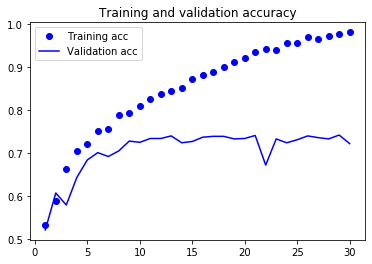

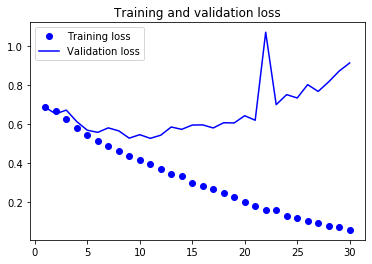

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from keras.preprocessing import image

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
   break

plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [46]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

model.save('cats_and_dogs_small_2.h5')
!cp cats_and_dogs_small_2.h5 '/content/gdrive/My Drive/data/dogs-vs-cats'

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 185s 2s/step - loss: 0.5251 - acc: 0.7387 - val_loss: 0.5118 - val_acc: 0.7544
Epoch 2/100
100/100 [==============================] - 182s 2s/step - loss: 0.5227 - acc: 0.7359 - val_loss: 0.5116 - val_acc: 0.7436
Epoch 3/100
100/100 [==============================] - 181s 2s/step - loss: 0.5148 - acc: 0.7397 - val_loss: 0.5144 - val_acc: 0.7430
Epoch 4/100
100/100 [==============================] - 180s 2s/step - loss: 0.5076 - acc: 0.7503 - val_loss: 0.4863 - val_acc: 0.7648
Epoch 5/100
100/100 [==============================] - 178s 2s/step - loss: 0.5074 - acc: 0.7550 - val_loss: 0.4896 - val_acc: 0.7621
Epoch 6/100
100/100 [==============================] - 182s 2s/step - loss: 0.5032 - acc: 0.7559 - val_loss: 0.4994 - val_acc: 0.7610
Epoch 7/100
100/100 [==============================] - 180s 2s/step - loss: 0.5076 - acc: 0.7606 - val_loss: 0.4

In [5]:
!pwd

/content


Saving dogs-cats small to drive

In [36]:
base_dir

'data/dogs-vs-cats-small'

In [38]:
!ls 'data/dogs-vs-cats-small'

test  train  validation


In [0]:
!zip -r dogs-vs-cats-small.zip data/dogs-vs-cats-small

In [44]:
ls -lh

total 114M
-rw-r--r-- 1 root root  27M Jan  9 12:35 cats_and_dogs_small_1.h5
drwxr-xr-x 4 root root 4.0K Jan  9 10:57 data/
-rw-r--r-- 1 root root  87M Jan  9 14:34 dogs-vs-cats-small.zip
drwx------ 4 root root 4.0K Jan  9 10:56 gdrive/
drwxr-xr-x 1 root root 4.0K Dec 18 16:52 sample_data/


In [0]:
!cp dogs-vs-cats-small.zip '/content/gdrive/My Drive/data/dogs-vs-cats'